# Дана функця плотности НСВ: 
$$\varphi(x) = 
\begin{cases} 
\displaystyle \frac{3}{8} x^2, & x \in [0,\, 2] \\
0, & \text{иначе}
\end{cases}$$


Размер выборки: 10000
Первые 10 значений: [1.89898331 0.84835866 1.28561753 1.02353168 0.86798728 1.84365293
 1.78957746 1.78787422 1.67914249 0.62545698]

Проверка нормировки плотности:
∫f(x)dx на [0.0, 2.0] = 1.000000 (ошибка: 1.11e-14)

Проверка в граничных точках:
F(0.0) = 0.000000
F(2.0) = 1.000000
*************Числовые характеристики:*************
Математическое ожидание: 1.5000
Дисперсия: 0.1500
СКО: 0.3873
Асимметрия: -0.8607
Эксцесс: 0.0952

********************Квантили:*********************
40%-квантиль: 1.4736
90%-ная точка: 1.9310

********Вероятность попадания в интервал:*********
P(0.5 <= X <= 1.5) = F(1.5) - F(0.5) = 0.4062



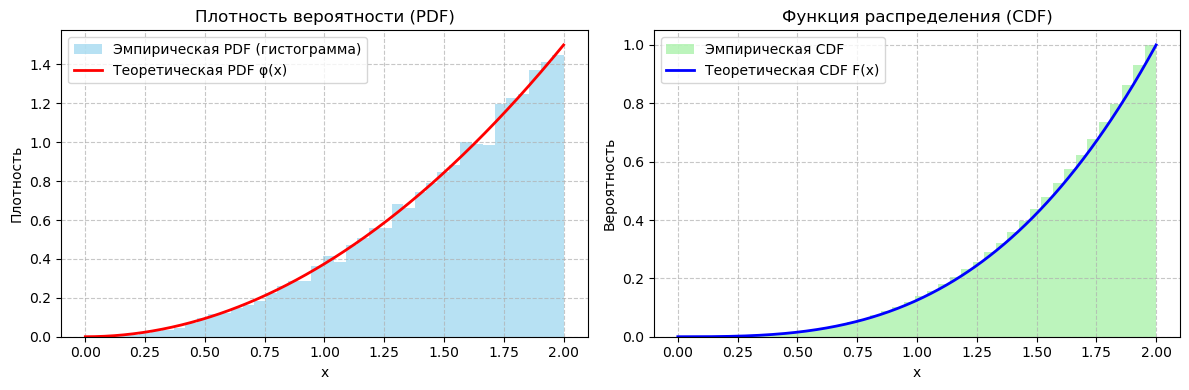

In [5]:
import numpy as np
from scipy.stats import rv_continuous
from scipy.integrate import quad
import matplotlib.pyplot as plt

# 1. Определим собственное распределение в классе
class CustomDistribution(rv_continuous):
    def _pdf(self, x):
        # Плотность вероятности (PDF)
        result = np.zeros_like(x)
        mask = (x >= 0) & (x <= 2)
        result[mask] = (3/8) * x[mask]**2
        return result

    def _cdf(self, x):
        # Функция распределения (CDF)
        result = np.zeros_like(x)
        mask1 = (x > 0) & (x < 2)
        mask2 = x >= 2
        result[mask1] = (1/8) * x[mask1]**3  # Интеграл от (3/8)*t^2 dt = (3/24)*x^3 = (1/8)*x^3
        result[mask2] = 1.0
        return result

    def _ppf(self, q):
        # Квантильная функция (PPF), обратная к CDF
        # y = (1/8) * x³ ,  x = (8*y)^(1/3)
        return (8 * q) ** (1/3)

# Создание экземпляра распределения
custom_dist = CustomDistribution(a=0.0, b=2.0, name='custom_dist')

# Генерация выборки
sample = custom_dist.rvs(size=10000)

print(f"Размер выборки: {len(sample)}")
print(f"Первые 10 значений: {sample[:10]}")

# Проверка нормировки плотности
integral, error = quad(custom_dist.pdf, 0.0, 2.0)
print("\nПроверка нормировки плотности:")
print(f"∫f(x)dx на [0.0, 2.0] = {integral:.6f} (ошибка: {error:.2e})")

# Проверка в граничных точках
print("\nПроверка в граничных точках:")
print(f"F(0.0) = {custom_dist.cdf(0.0):.6f}")
print(f"F(2.0) = {custom_dist.cdf(2.0):.6f}")

# Проверка условия нормировки плотности
norm_check, norm_error = quad(custom_dist.pdf, 0, 2)

# Рассчитаем основные характеристики и квантили
mean_val = custom_dist.mean()
var_val = custom_dist.var()
std_val = custom_dist.std()
skew_val = custom_dist.stats(moments='s')  # асимметрия
kurt_val = custom_dist.stats(moments='k')  # эксцесс (в scipy это excess kurtosis)

q_level = 0.4  # Уровень для квантиля
quantile_val = custom_dist.ppf(q_level)

p_percent = 90  # Уровень для p%-ной точки
p_point_val = custom_dist.ppf(p_percent / 100)

# Рассчитаем вероятность попадания в интервал [a, b]
a_interval, b_interval = 0.5, 1.5
prob_interval = custom_dist.cdf(b_interval) - custom_dist.cdf(a_interval)

print("Числовые характеристики:".center(50, '*'))
print(f"Математическое ожидание: {mean_val:.4f}")
print(f"Дисперсия: {var_val:.4f}")
print(f"СКО: {std_val:.4f}")
print(f"Асимметрия: {skew_val:.4f}")
print(f"Эксцесс: {kurt_val:.4f}")
print()

print("Квантили:".center(50, '*'))
print(f"{q_level:.0%}-квантиль: {quantile_val:.4f}")
print(f"{p_percent}%-ная точка: {p_point_val:.4f}")
print()

print("Вероятность попадания в интервал:".center(50, '*'))
print(f"P({a_interval} <= X <= {b_interval}) = F({b_interval}) - F({a_interval}) = {prob_interval:.4f}")
print()

# Генерация выборки и построение графиков
sample = custom_dist.rvs(size=10000)

x = np.linspace(0, 2, 400)
pdf_vals = custom_dist.pdf(x)
cdf_vals = custom_dist.cdf(x)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# График плотности (PDF)
axs[0].hist(sample, bins=40, density=True, alpha=0.6, color='skyblue', label='Эмпирическая PDF (гистограмма)')
axs[0].plot(x, pdf_vals, 'r-', lw=2, label='Теоретическая PDF φ(x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Плотность')
axs[0].set_title('Плотность вероятности (PDF)')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# График функции распределения (CDF)
axs[1].hist(sample, bins=40, density=True, cumulative=True, alpha=0.6, color='lightgreen', label='Эмпирическая CDF')
axs[1].plot(x, cdf_vals, 'b-', lw=2, label='Теоретическая CDF F(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Вероятность')
axs[1].set_title('Функция распределения (CDF)')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()